In [11]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
from sklearn.svm import SVC
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# EDA

In [13]:
df_train = pd.read_csv('dataset/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
df_test = pd.read_csv('dataset/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [15]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [17]:
df_train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [18]:
df_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

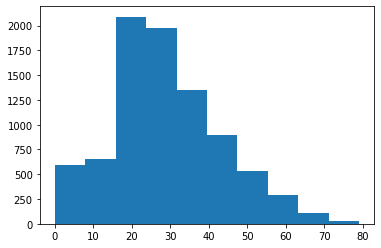

In [19]:
plt.hist(df_train.Age)

In [20]:
print(f'Training samples shape with NA values: {df_train.shape}')
print(f'Training samples shape without NA values: {df_train.dropna().shape}')


Training samples shape with NA values: (8693, 14)
Training samples shape without NA values: (6606, 14)


In [21]:
df_train_without_na = df_train.dropna()
df_train_without_na.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
df_train_without_na.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950
Transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000


the correlation results shows that `HomePlanet`, `CryoSleep`, `VIP`, `Destination` has the highest correlation with `Transported`. So we're going to use them in prediction.

In [23]:
df_train_without_na.Spa.value_counts()

0.0       4109
1.0        113
2.0         80
5.0         44
3.0         44
          ... 
1792.0       1
330.0        1
1924.0       1
3440.0       1
1643.0       1
Name: Spa, Length: 1143, dtype: int64

In [24]:
df_test_without_na = df_test.dropna()
print(f'Test samples shape with NA values: {df_test.shape}')
print(f'Test samples shape without NA values: {df_test_without_na.dropna().shape}')

Test samples shape with NA values: (4277, 13)
Test samples shape without NA values: (3281, 13)


In [25]:
df_train_without_na.VIP = df_train_without_na.VIP.astype(bool)
df_test_without_na.VIP = df_test.VIP.astype(bool)

/home/amin/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
cols = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination' ]

In [27]:
df_train_without_na.Destination.value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [28]:
df_train_dict = df_train_without_na[cols].to_dict(orient='records')

In [29]:
dv = DictVectorizer(sparse=False)
df_train_X = dv.fit_transform(df_train_dict)

In [30]:
dv.feature_names_

['CryoSleep',
 'Destination=55 Cancri e',
 'Destination=PSO J318.5-22',
 'Destination=TRAPPIST-1e',
 'HomePlanet=Earth',
 'HomePlanet=Europa',
 'HomePlanet=Mars',
 'VIP']

In [31]:
dv.vocabulary_

{'HomePlanet=Europa': 5,
 'CryoSleep': 0,
 'VIP': 7,
 'Destination=TRAPPIST-1e': 3,
 'HomePlanet=Earth': 4,
 'Destination=PSO J318.5-22': 2,
 'Destination=55 Cancri e': 1,
 'HomePlanet=Mars': 6}

In [32]:
## set of columns that will be used in training
cols_training = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'Age']

In [33]:
df_train_X = pd.get_dummies(df_train_without_na[cols_training], columns=cols)

In [34]:
df_train_X.head()

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39.0,0,1,0,1,0,1,0,0,0,1
1,24.0,1,0,0,1,0,1,0,0,0,1
2,58.0,0,1,0,1,0,0,1,0,0,1
3,33.0,0,1,0,1,0,1,0,0,0,1
4,16.0,1,0,0,1,0,1,0,0,0,1


In [35]:
df_train_Y = df_train_without_na.Transported

# Training phase

In [36]:
svm_model = SVC(random_state=123)
svm_model.fit(df_train_X, df_train_Y)

SVC(random_state=123)

In [37]:
train_pred = svm_model.predict(df_train_X)
confusion_matrix = confusion_matrix(df_train_Y, train_pred)

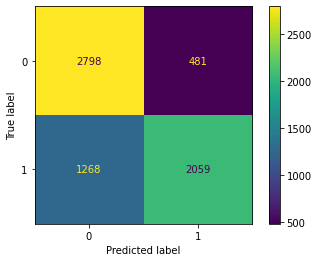

In [38]:
ConfusionMatrixDisplay(confusion_matrix).plot()


In [39]:
## Accuracy
acc = 0
for i in range(0, 2):
    acc += confusion_matrix[i, i]
acc * 100 / len(train_pred)

73.52406902815622

The training Accuracy is 73.5

# Prediciton phase

### prediction for non-null values.

In [41]:
## Test phase
df_test_X = pd.get_dummies(df_test_without_na[cols_training],columns=cols)
df_test_X.head()

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,27.0,1,0,0,0,1,1,0,0,0,1
1,19.0,1,0,0,1,0,1,0,0,0,1
2,31.0,0,1,0,0,1,1,0,1,0,0
3,38.0,0,1,0,1,0,1,0,0,0,1
4,20.0,1,0,0,1,0,1,0,0,0,1


In [42]:
test_results = svm_model.predict(df_test_X)

In [43]:
submission_data = np.vstack((df_test_without_na.PassengerId.values, test_results)) 
submission_data

array([['0013_01', '0018_01', '0019_01', ..., '9266_01', '9266_02',
        '9277_01'],
       [True, False, True, ..., False, True, True]], dtype=object)

In [44]:
df_submission = pd.DataFrame(submission_data.T, columns=['PassengerId', 'Transported'])
df_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [45]:
## save predictions to csv file
df_submission.to_csv('submission-without-null-values.csv', index=False)

## Filling null values
Filling null values in test set.

In [46]:
(df_test[cols_training].isna()).sum()

HomePlanet     87
CryoSleep      93
VIP            93
Destination    92
Age            91
dtype: int64

In [47]:
df_test[cols_training].dtypes

HomePlanet      object
CryoSleep       object
VIP             object
Destination     object
Age            float64
dtype: object

In [48]:
## Fill the Age null values
df_test_filled = df_test.copy()
######### fill Age
df_test_filled.Age = df_test['Age'].fillna(df_test_without_na.Age.mean())
######### fill Earth
## filling thoes without HomePlanet with Earth
df_test_filled.HomePlanet = df_test_filled.HomePlanet.fillna('Earth')
 
    

######### fill CryoSleep
df_test_filled.CryoSleep = df_test_filled.CryoSleep.fillna(method='bfill')

######### fill VIP
df_test_filled.VIP = df_test_filled.VIP.fillna(method='bfill')

######### fill Destination
df_test_filled.Destination = df_test_filled.Destination.fillna(method='bfill')

In [49]:
df_test_filled.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [50]:
df_test_dummy_filled = pd.get_dummies(df_test_filled[cols_training], columns=cols)
df_test_dummy_filled.head()

,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,27.0,1,0,0,0,1,1,0,0,0,1
1,19.0,1,0,0,1,0,1,0,0,0,1
2,31.0,0,1,0,0,1,1,0,1,0,0
3,38.0,0,1,0,1,0,1,0,0,0,1
4,20.0,1,0,0,1,0,1,0,0,0,1


In [51]:
df_test_dummy_filled.isna().sum()

Age                          0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
VIP_False                    0
VIP_True                     0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [52]:
## test prediction of all values
test_pred_all = svm_model.predict(df_test_dummy_filled)

In [53]:
test_pred_all

array([ True, False,  True, ...,  True, False,  True])

In [54]:
submision_data = np.vstack((df_test.PassengerId, test_pred_all))
df_prediction = pd.DataFrame(submision_data.T, columns=['PassengerId', 'Transported'])
df_prediction.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [55]:
df_prediction.shape


(4277, 2)

In [56]:
df_prediction.to_csv('submission.csv')